`Import Library`

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`Read Data`

In [73]:
data_train = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/House_Price/train.csv')
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data_test = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/House_Price/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
df_train = data_train.copy()
df_test = data_test.copy()

df_train_x = df_train.drop('SalePrice',axis=1)
df_train_y = df_train['SalePrice']

df_all_x = pd.concat([df_train_x,df_test],axis=0)

`check missing value dalam data dan tipe data`

In [76]:
(data_train.isna().sum()* 100 / len(data_train)).sort_values(ascending=False).head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [77]:
print('variabel kategori = {}'.format(df_train.select_dtypes(include='object').columns))
print('\nvariabel numerik = {}'.format(df_train.select_dtypes(exclude='object').columns))
print('')
print('jumlah variabel data = {} dan baris = {}'.format(df_train.shape[1],df_train.shape[0]))
print('jumlah tipe data kategori = {} dan numerik = {}'.format(
    len(df_train.select_dtypes(include='object').columns),len(df_train.select_dtypes(exclude='object').columns)
))

variabel kategori = Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

variabel numerik = Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBa

# `Data Cleaning`

`check data duplikat`

In [78]:
df_train[df_train.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**hapus variabel jika missing value mendekati atau lebih dari 50%**

In [79]:
#filter data dari persentase missing value
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)
df_all_x.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

***visualisasi data untuk melihat pola penyebaran data***

`jika data menjauhi bentuk skew isi dengan median`

`jika data mendekati bentuk skew isi dengan rata-rata`

`jika data tidak sama sekali membentuk skew isi dengan modus`

In [80]:
#numerikal data
df_train1 = df_train.select_dtypes(exclude='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

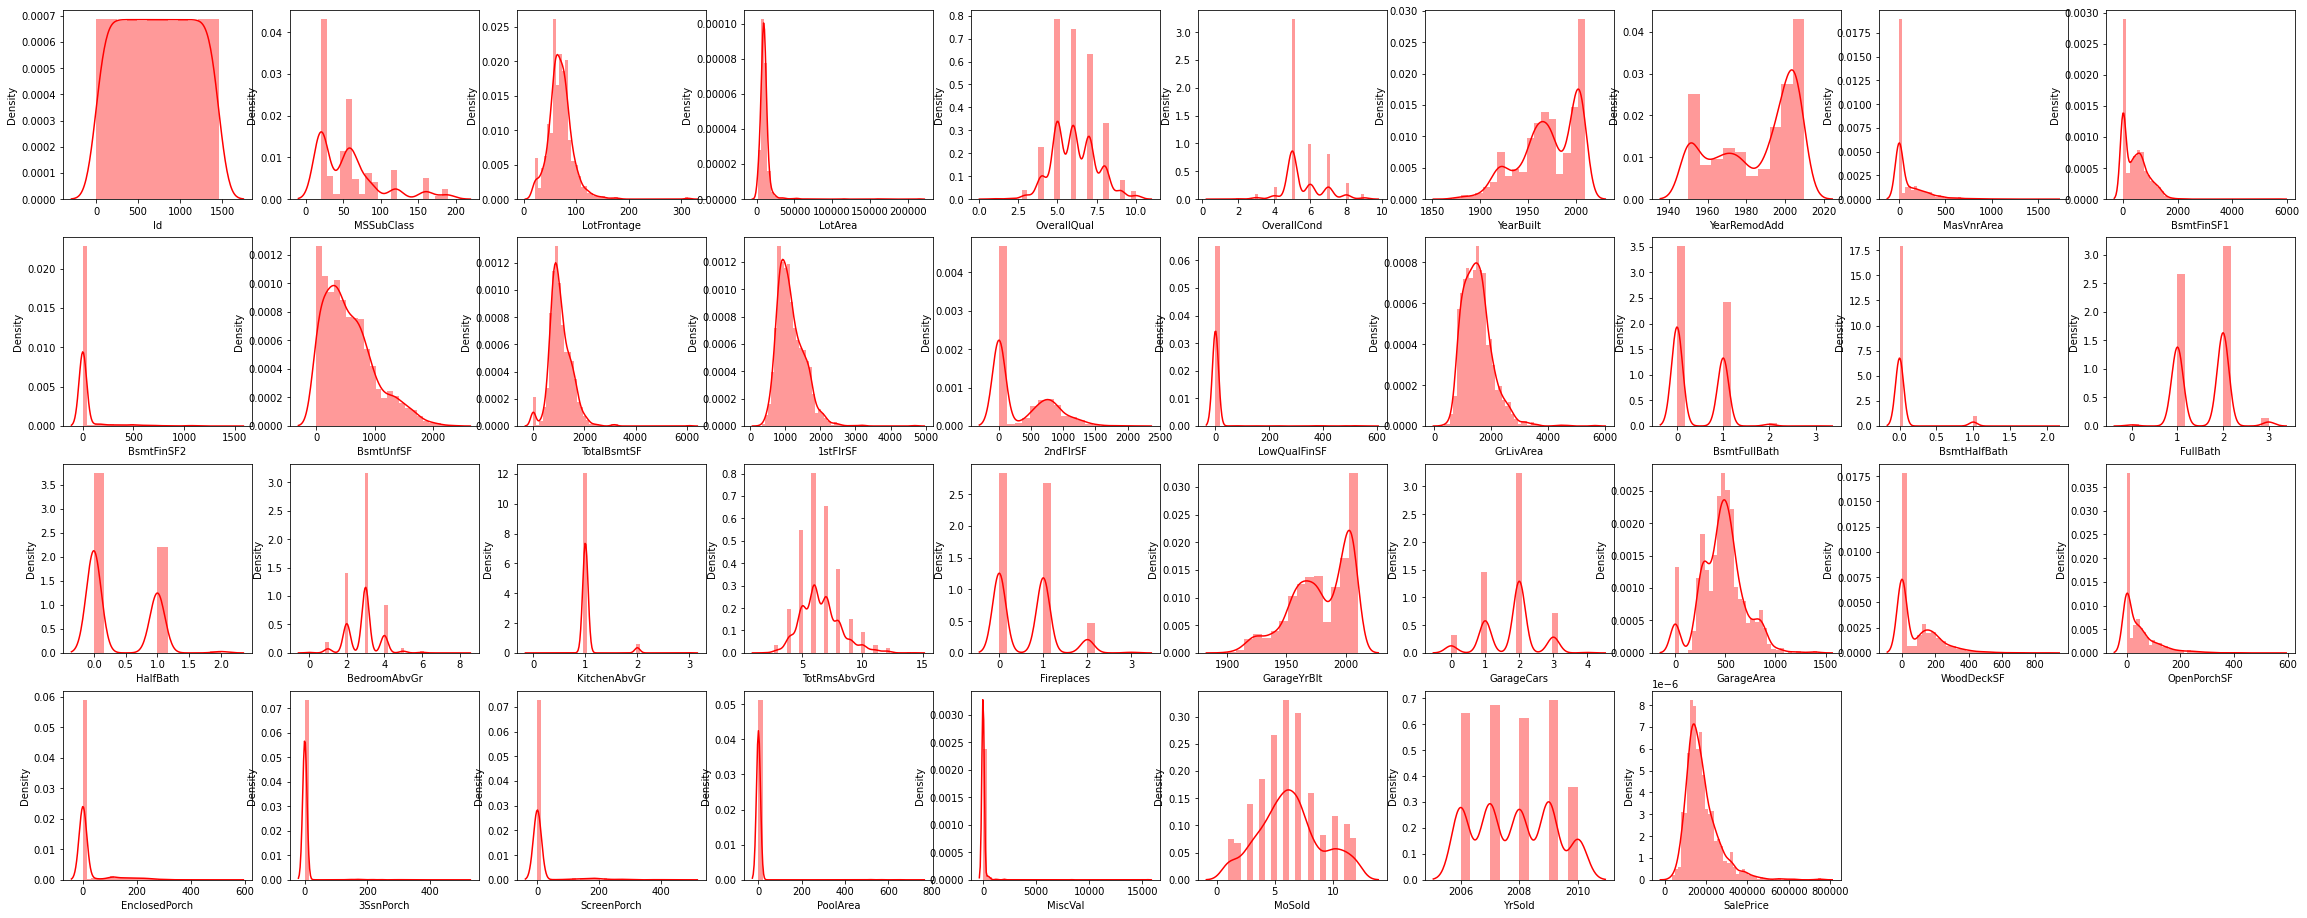

In [81]:
col = df_train1.columns

plt.figure(figsize=(40,16))
for i in range(0,len(col)):
  plt.subplot(4,10,i+1)
  sns.distplot(df_train1[df_train1.columns[i]],color='red')
  plt.tight_layout

In [82]:
# melihat kolom yang terdapat missing value
df_train1.columns[df_train1.isna().any()].to_list()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

`Imputing missing value variabel numerik`

In [83]:
df_train1['LotFrontage'].fillna(df_train1['LotFrontage'].mean(), inplace = True)

mediantreat = ['GarageYrBlt', 'MasVnrArea']
for j in mediantreat:
  df_train1.loc[df_train1.loc[:,j].isnull(),j] = df_train1.loc[:,j].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

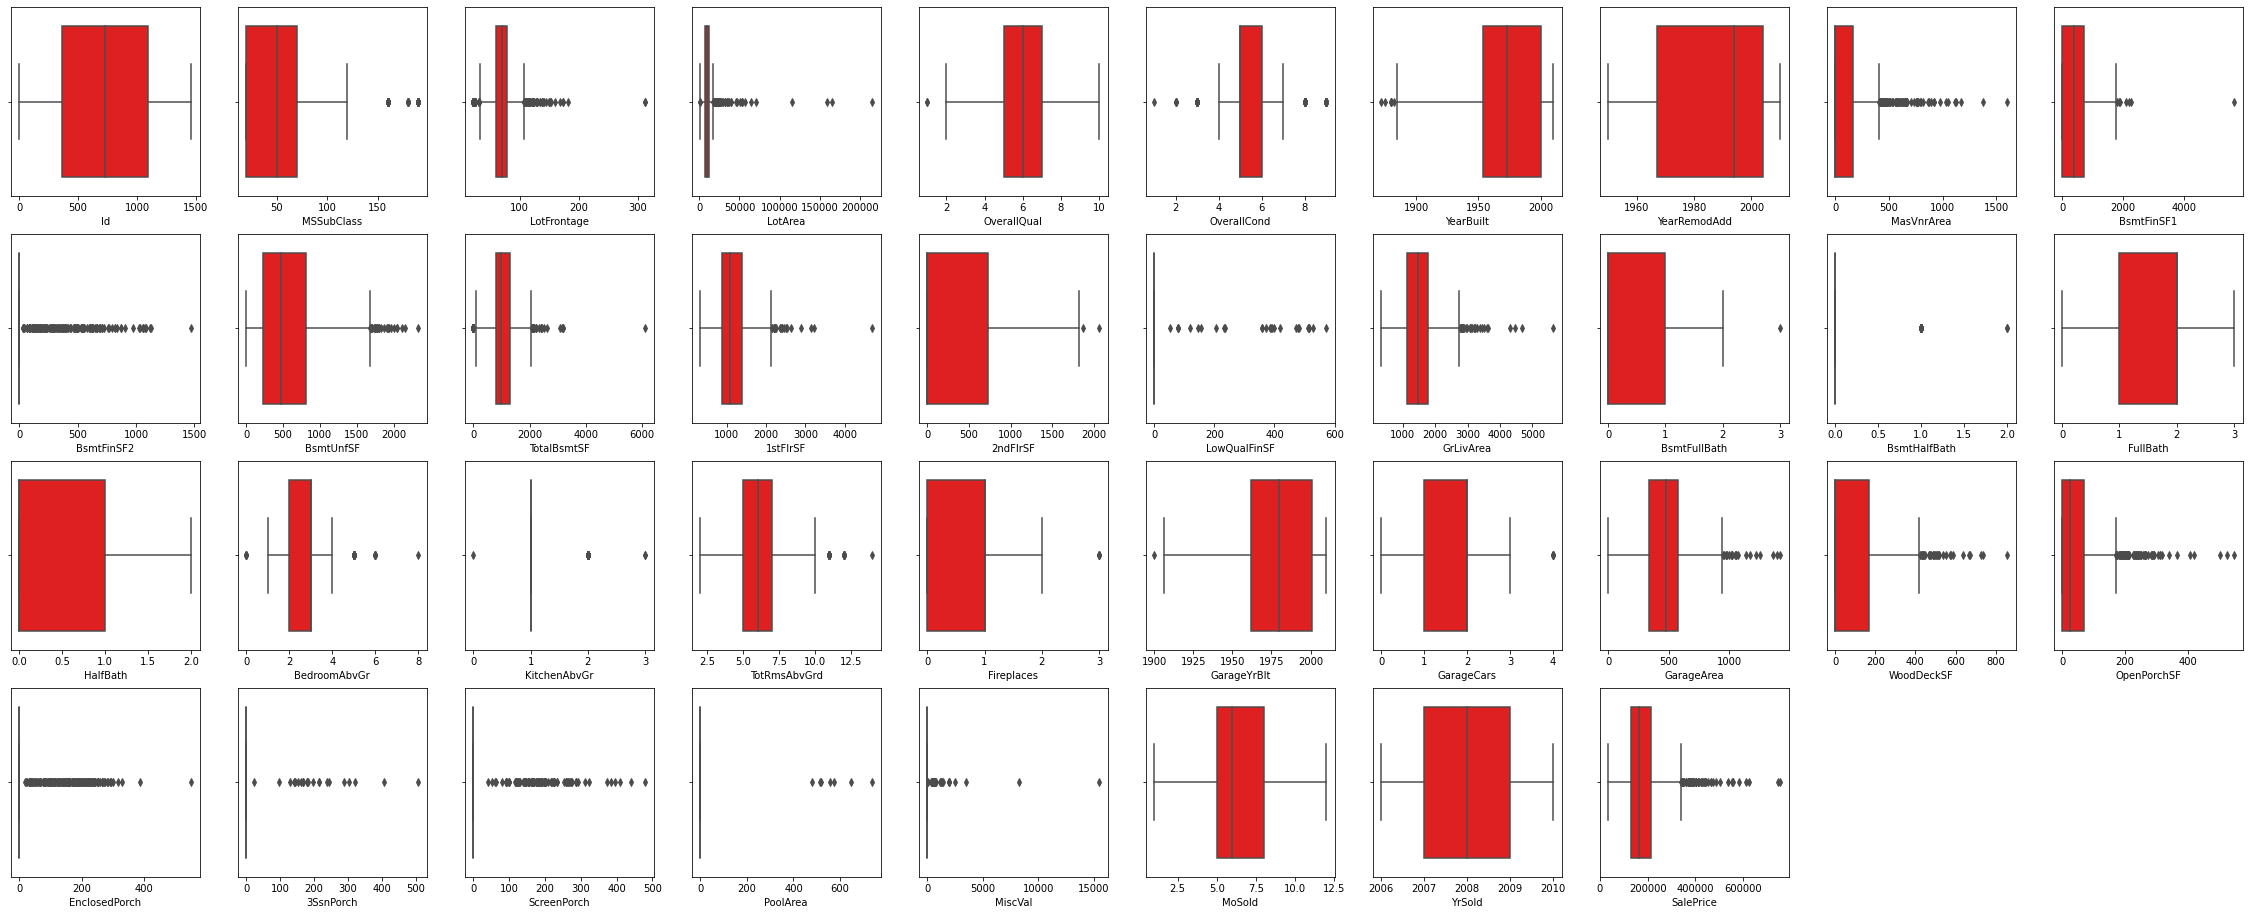

In [84]:
col = df_train1.columns

plt.figure(figsize=(40,16))
for i in range(0,len(col)):
  plt.subplot(4,10,i+1)
  sns.boxplot(df_train1[df_train1.columns[i]],color='red')
  plt.tight_layout

`menghapus outlier dengan zscore`

In [85]:
from scipy import stats
df_train1 = df_train1[(np.abs(stats.zscore(df_train1)) < 3).all(axis=1)]

In [86]:
print('jumlah baris sebelum zscore = {}'.format(df_train.shape[0]))
print('jumlah baris setelah zscore = {}'.format(df_train1.shape[0]))

jumlah baris sebelum zscore = 1460
jumlah baris setelah zscore = 1015


***visualisasi data untuk melihat pola perbandingan class data***

`data yang kosong isi dengan nilai modus`

In [87]:
df_train2 = df_train.select_dtypes(include='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

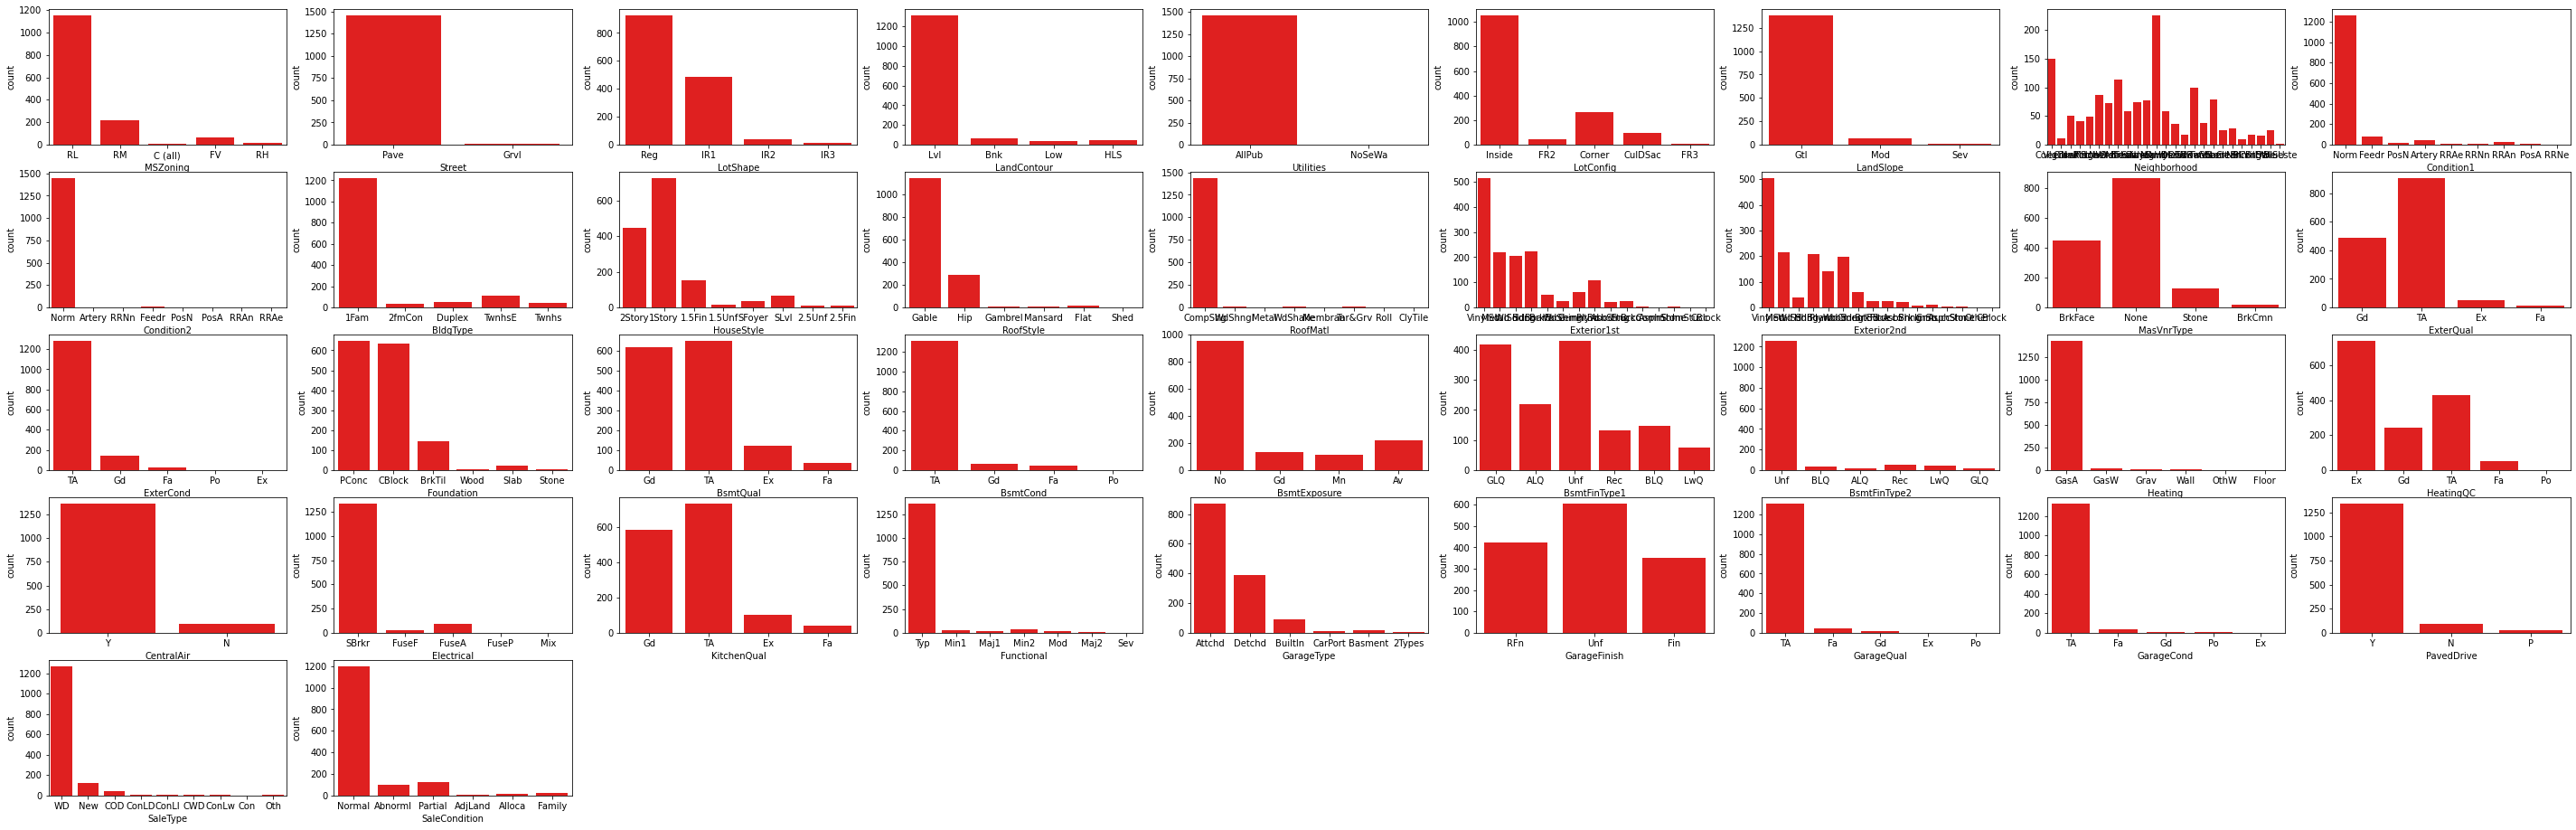

In [88]:
col = df_train2.columns

plt.figure(figsize=(50,16))
for i in range(0,len(col)):
  plt.subplot(5,9,i+1)
  sns.countplot(df_train2[df_train2.columns[i]],color='red')
  plt.tight_layout

In [89]:
df_train2.columns[df_train2.isna().any()].to_list()

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

`Imputing missing value variabel kategori`

In [90]:
modetreat = df_train2.columns[df_train2.isna().any()].to_list()

for i in modetreat:
  df_train2.loc[df_train2.loc[:,i].isna(),i] = df_train2.loc[:,i].mode()[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


`check data kategori yang timpang`

In [91]:
nlabel = []
for col in df_train2.columns:
  nlabel.append(df_train2[col].nunique())

df = pd.DataFrame(list(zip(df_train2.columns, nlabel)),columns=['variabel','jumlah_label'])
df[df.jumlah_label>6]

,variabel,jumlah_label
7,Neighborhood,25
8,Condition1,9
9,Condition2,8
11,HouseStyle,8
13,RoofMatl,8
14,Exterior1st,15
15,Exterior2nd,16
30,Functional,7
36,SaleType,9


In [92]:
for i in df_train2.columns:
  print(df_train2[i].value_counts(normalize=True).mul(100))
  print('')

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timbe

`terdapat ketimpangan dalam variabel kategori`

solusi = pengelompokan dan menghapus beberapa variabel

#`Feature Engineering`

In [93]:
#numerik engineering
df_train1.drop(['Id'],axis=1,inplace=True)
df_train1['Total_SF']= df_train1['TotalBsmtSF'] + df_train1['1stFlrSF'] + df_train1['2ndFlrSF'] +df_train1['LowQualFinSF']
df_train1['Total_Bathrooms'] = df_train1['FullBath'] + df_train1['HalfBath'] + df_train1['BsmtFullBath'] + df_train1['BsmtHalfBath']
df_train1['Total_Porch'] = df_train1['OpenPorchSF'] + df_train1['3SsnPorch'] + df_train1['EnclosedPorch'] + df_train1['ScreenPorch']

#kategori engineering
df_train2.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','GarageQual',
                'GarageCond','Functional','Exterior1st','Exterior2nd','Neighborhood'],axis=1,inplace=True)
df_train2['MSZoning'] = df_train2['MSZoning'].replace(['FV','RH','C (all)'],'Other')
df_train2['LotShape'] = df_train2['LotShape'].replace(['IR1','IR2','IR3'],'IR')
df_train2['LotConfig'] = df_train2['LotConfig'].replace(['FR2','FR3'],'FR')
df_train2['Condition1'] = df_train2['Condition1'].replace(['RRAn','RRAe'],'RRA') 
df_train2['Condition1'] = df_train2['Condition1'].replace(['RRNn','RRNe'],'RRN') 
df_train2['Condition1'] = df_train2['Condition1'].replace(['PosN','PosA'],'Pos') 
df_train2['HouseStyle'] = df_train2['HouseStyle'].replace(['1Story','2Story'],'Story')
df_train2['HouseStyle'] = df_train2['HouseStyle'].replace(['1.5Fin','2.5Fin'],'5Fin')
df_train2['HouseStyle'] = df_train2['HouseStyle'].replace(['1.5Unf','2.5Unf'],'5Unf')
df_train2['RoofStyle'] = df_train2['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other')
df_train2['MasVnrType'] = df_train2['MasVnrType'].replace({'BrkCmn':'Stone'})
df_train2['ExterQual'] = df_train2['ExterQual'].replace({'Fa':'Ex'})
df_train2['ExterCond'] = df_train2['ExterCond'].replace(['Ex','Po'],'Fa')
df_train2['Foundation'] = df_train2['Foundation'].replace(['Stone','Wood'],'Slab')
df_train2['BsmtCond'] = df_train2['BsmtCond'].replace({'Po':'Fa'})
df_train2['HeatingQC'] = df_train2['HeatingQC'].replace({'Po':'Fa'})
df_train2['Electrical'] = df_train2['Electrical'].replace(['FuseA','FuseF','FuseP','Mix'],'Fuse')
df_train2['GarageType'] = df_train2['GarageType'].replace(['Basment','CarPort','2Types'],'Other')
df_train2['SaleType'] = df_train2['SaleType'].replace(['ConLD','ConLI','ConLw','CWD','Oth','Con'],'Other')
df_train2['SaleCondition'] = df_train2['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Other')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [94]:
print('jumlah tipe data kategori = {} dan numerik = {}'.format(
    len(df_train2.columns),len(df_train1.columns)))

jumlah tipe data kategori = 26 dan numerik = 40


# `EDA`

`univariat`

In [95]:
df_train1.describe().loc[['mean','50%','std']].T

,mean,50%,std
MSSubClass,53.931034,50.000000,40.369535
LotFrontage,67.484476,70.049958,18.288927
LotArea,9139.664039,9066.000000,3634.390581
OverallQual,6.072906,6.000000,1.314689
OverallCond,5.521182,5.000000,0.984743
YearBuilt,1975.111330,1977.000000,29.052194
YearRemodAdd,1986.039409,1996.000000,20.737640
MasVnrArea,82.213793,0.000000,130.064354
BsmtFinSF1,413.388177,386.000000,403.773301
BsmtFinSF2,18.672906,0.000000,75.643182




*   *skew adalah mean mendekati median / normal adalah mean=median*
*   *nilai varians dalam data tergolong rendah*


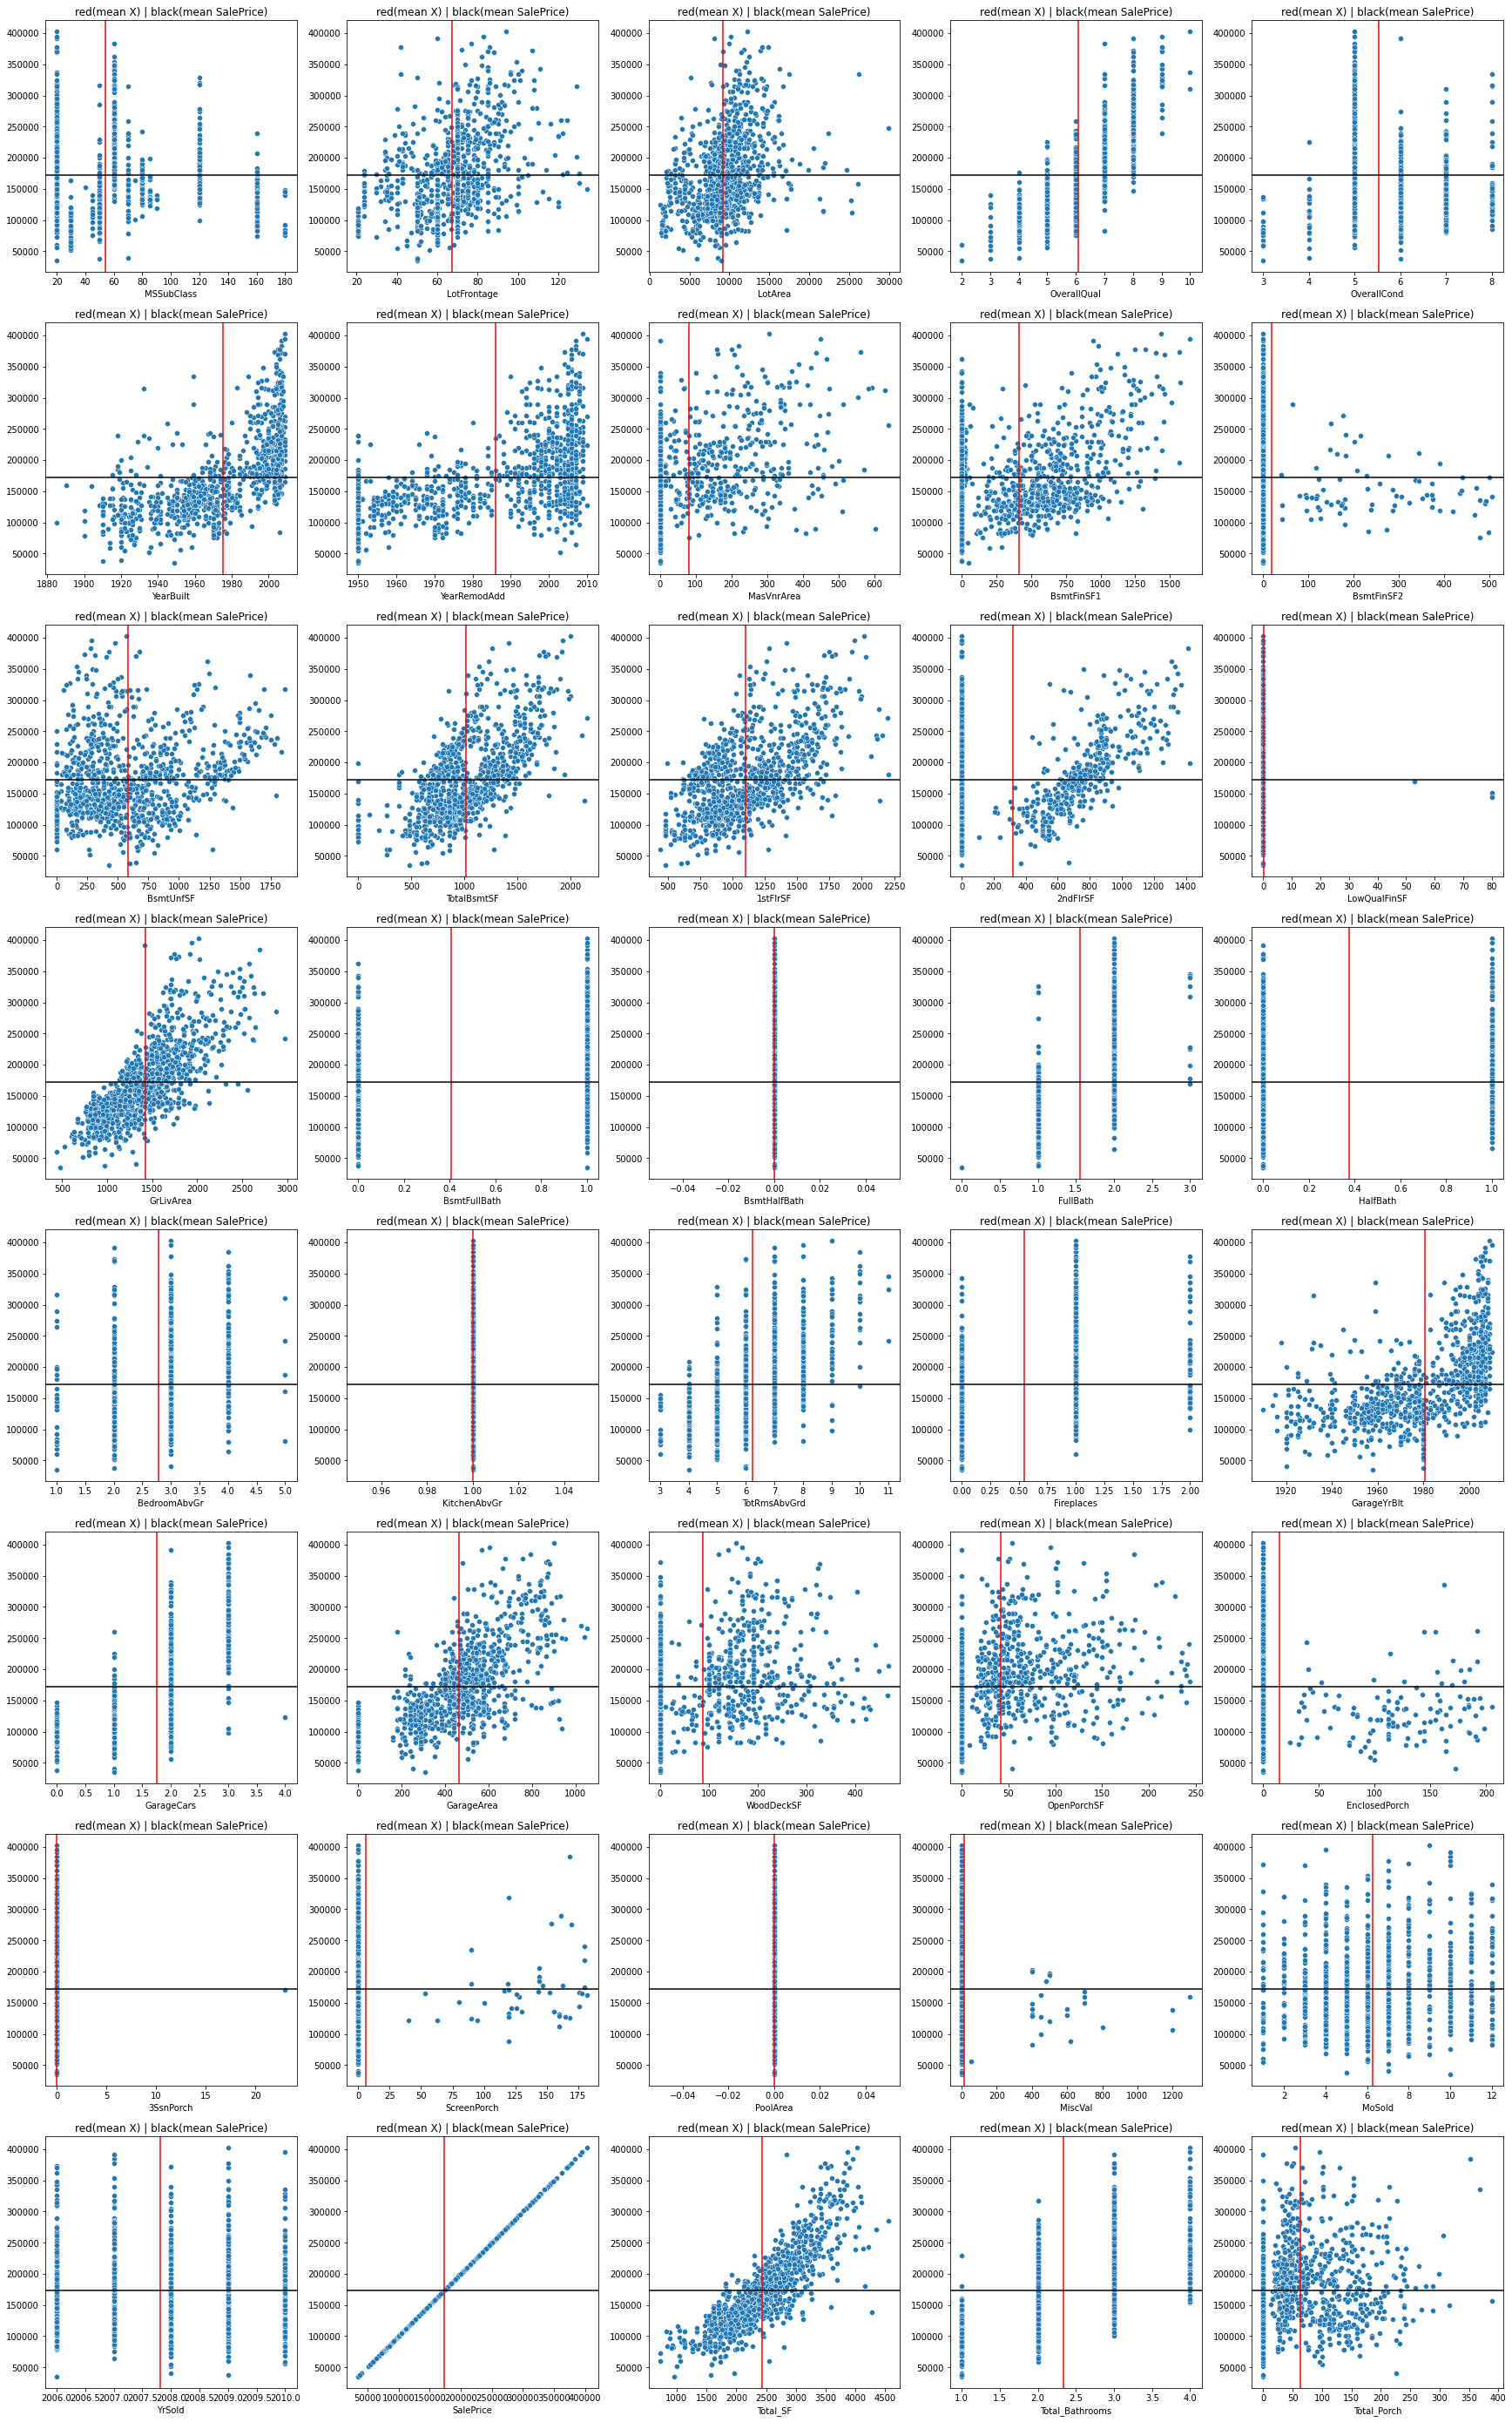

In [96]:
col = df_train1.columns

a = 8
b = 5
c = 1

fig = plt.figure(figsize=(30,50))
for i in col:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    plt.title('red(mean X) | black(mean SalePrice)')
    sns.scatterplot(data=df_train1,y='SalePrice',x=i,palette="deep")
    plt.ylabel(None)
    plt.axvline(x=df_train1[i].mean(),color='red')
    plt.axhline(y=df_train1['SalePrice'].mean(),color='black')
    c = c + 1

plt.show()

`delete variable`
*   variabel 'LowQualFinSF' tidak memberikan informasi lebih / sudah kontribusi pada variabel 'Total_SF'
*   variabel 'BsmtHalfBath' tidak memberikan informasi lebih / sudah kontribusi pada variabel 'Total_Bathrooms'
*   variabel '3SsnPorch' tidak memberikan informasi lebih / sudah kontribusi pada variabel 'Total_Porch'

`new category variable`
*   variabel 'KitchenAbvGr' akan diubah menjadi bentuk kategori 'haskitchen'
*   variabel 'PoolArea' akan diubah menjadi bentuk kategori 'haspool'

In [97]:
df_train1.drop(['LowQualFinSF','BsmtHalfBath','3SsnPorch'],axis=1,inplace=True)
df_train2['haspool'] = df_train1['PoolArea'].apply(lambda x: 'Yes' if x > 0 else 'No')
df_train2['haskitchen'] = df_train1['KitchenAbvGr'].apply(lambda x: 'Yes' if x > 0 else 'No')
df_train1.drop(['PoolArea','KitchenAbvGr'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Bulan Penjualan')

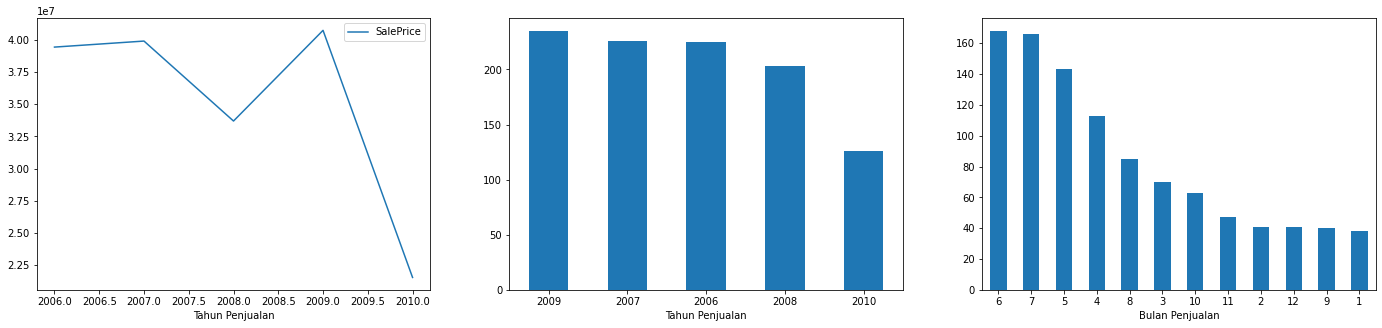

In [98]:
plt.figure(figsize=(24,5))

ax = plt.subplot(131)
df_train1.groupby('YrSold').sum()['SalePrice'].reset_index().plot(kind='line',x='YrSold',y='SalePrice',ax=ax)
plt.xlabel('Tahun Penjualan')

ax = plt.subplot(132)
df_train1['YrSold'].value_counts().plot(kind='bar',ax=ax)
plt.xticks(rotation='0')
plt.xlabel('Tahun Penjualan')

ax = plt.subplot(133)
df_train1['MoSold'].value_counts().plot(kind='bar',ax=ax)
plt.xticks(rotation='0')
plt.xlabel('Bulan Penjualan')

***dapat terlihat bahwa data 2010 tidak sebanding dengan tahun sebelumnya***

Text(0.5, 0, 'Tahun Penjualan')

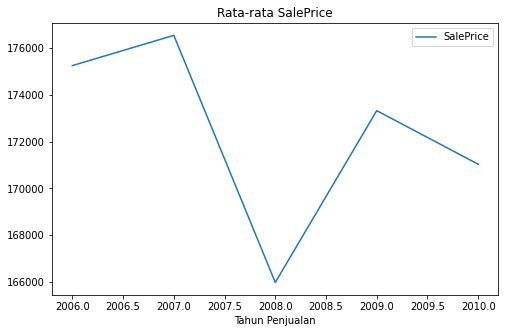

In [99]:
df_train1.groupby('YrSold').mean()['SalePrice'].reset_index().plot(kind='line',x='YrSold',y='SalePrice',figsize=(8,5))
plt.title('Rata-rata SalePrice')
plt.xlabel('Tahun Penjualan')

`bivariat`

*   numerik - numerik = regression pvalue
*   numerik - kategori = anova

In [100]:
from sklearn.feature_selection import f_regression,f_classif,SelectKBest,mutual_info_classif

#REGRESI

X = df_train1.drop('SalePrice',axis=1)
y = df_train1['SalePrice']

f_val, p_val = f_regression(X,y)
np.where(p_val>0.05)

(array([ 0, 27, 30]),)

In [101]:
df_train1.iloc[:,[0,23,26]].columns

Index(['MSSubClass', 'GarageArea', 'EnclosedPorch'], dtype='object')

***variabel (MSSubClass,ScreenPorch) tidak signifikan terhadap variabel target***

In [102]:
#df_train1.drop(['MSSubClass','ScreenPorch'],axis=1,inplace=True)

`multivariat`

In [103]:
df_train1.drop(['SalePrice'],axis=1).corr().style.background_gradient(sns.light_palette('red', as_cmap=True))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,Total_SF,Total_Bathrooms,Total_Porch
MSSubClass,1.000000,-0.515123,-0.495189,0.133864,-0.093637,0.182205,0.135215,0.078646,-0.088829,0.002132,-0.151001,-0.275150,-0.336988,0.338882,0.064087,-0.014150,0.140386,0.275783,-0.180731,-0.057435,0.010816,0.164712,0.009244,-0.071451,0.009642,0.036305,-0.070120,-0.044288,-0.056403,-0.026249,-0.011858,-0.110215,0.224713,-0.034639
LotFrontage,-0.515123,1.000000,0.585254,0.225072,-0.026661,0.152420,0.092562,0.135238,0.153106,-0.014902,0.138262,0.329233,0.387625,0.030286,0.325170,0.052736,0.180970,0.033053,0.322628,0.331766,0.233813,0.088465,0.301259,0.344658,0.116453,0.137593,-0.030646,0.040681,0.028588,0.015436,0.000125,0.395472,0.153048,0.104556
LotArea,-0.495189,0.585254,1.000000,0.152209,-0.046554,0.071720,0.028915,0.087924,0.155771,-0.006188,0.092942,0.281027,0.368256,0.101191,0.377963,0.056836,0.207482,0.077594,0.397120,0.390803,0.266297,0.037446,0.265237,0.295736,0.155434,0.094900,-0.026221,0.056422,0.043179,0.001385,-0.018849,0.403427,0.195120,0.080946
OverallQual,0.133864,0.225072,0.152209,1.000000,-0.195442,0.640335,0.577426,0.385218,0.159035,-0.144207,0.322801,0.524640,0.454096,0.287150,0.621254,0.088498,0.649309,0.246783,0.158768,0.473326,0.357975,0.564412,0.621167,0.563529,0.247274,0.355960,-0.173149,-0.034565,-0.061881,0.079260,-0.018551,0.697814,0.563312,0.153125
OverallCond,-0.093637,-0.026661,-0.046554,-0.195442,1.000000,-0.426478,-0.033604,-0.136611,-0.001668,0.068581,-0.155661,-0.169567,-0.126174,-0.057623,-0.151755,0.012787,-0.270802,-0.066287,-0.032842,-0.100838,-0.065504,-0.360285,-0.229541,-0.185772,-0.048234,-0.104688,0.124255,0.098420,0.115613,-0.016217,0.060016,-0.193371,-0.187440,0.037762
YearBuilt,0.182205,0.152420,0.071720,0.640335,-0.426478,1.000000,0.670122,0.306152,0.199240,-0.076259,0.193959,0.432976,0.310828,0.119378,0.352317,0.174674,0.608252,0.245701,0.038113,0.226675,0.156675,0.831972,0.594432,0.524324,0.252714,0.306713,-0.419243,-0.100136,-0.095868,0.012298,-0.021680,0.470685,0.586416,-0.066524
YearRemodAdd,0.135215,0.092562,0.028915,0.577426,-0.033604,0.670122,1.000000,0.176072,0.070944,-0.141143,0.231908,0.320799,0.269926,0.161091,0.360308,0.121840,0.536941,0.200164,0.019375,0.260810,0.100713,0.659492,0.479043,0.409987,0.210206,0.305762,-0.217503,-0.051324,-0.078967,0.010887,0.019097,0.413854,0.490628,0.079674
MasVnrArea,0.078646,0.135238,0.087924,0.385218,-0.136611,0.306152,0.176072,1.000000,0.223166,-0.049705,0.083278,0.335762,0.312508,0.094266,0.328914,0.108461,0.255759,0.135200,0.097029,0.251652,0.227295,0.239555,0.348385,0.338455,0.180631,0.131274,-0.143097,-0.028712,-0.050243,0.019505,0.008362,0.401541,0.283356,-0.000110
BsmtFinSF1,-0.088829,0.153106,0.155771,0.159035,-0.001668,0.199240,0.070944,0.223166,1.000000,0.008457,-0.600750,0.413921,0.357314,-0.188907,0.094519,0.697562,0.044039,-0.065578,-0.059604,0.000626,0.178904,0.114842,0.177841,0.237558,0.190490,0.043723,-0.108434,0.042960,-0.008466,-0.018917,0.050121,0.291039,0.376117,-0.016371
BsmtFinSF2,0.002132,-0.014902,-0.006188,-0.144207,0.068581,-0.076259,-0.141143,-0.049705,0.008457,1.000000,-0.187098,-0.000542,-0.017894,-0.076932,-0.086860,0.129702,-0.124976,-0.051743,0.020086,-0.083741,-0.040415,-0.087312,-0.080891,-0.039233,0.049788,-0.094144,0.001060,0.031758,-0.015715,-0.009365,0.019422,-0.057275,-0.029512,-0.059154


In [104]:
korelasi = df_train1.drop('SalePrice',axis=1).corr().abs()

upper_corr = korelasi.where(np.triu(np.ones(korelasi.shape),k=1).astype(np.bool))
print(upper_corr)

                 MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass              NaN     0.515123  0.495189     0.133864     0.093637   
LotFrontage             NaN          NaN  0.585254     0.225072     0.026661   
LotArea                 NaN          NaN       NaN     0.152209     0.046554   
OverallQual             NaN          NaN       NaN          NaN     0.195442   
OverallCond             NaN          NaN       NaN          NaN          NaN   
YearBuilt               NaN          NaN       NaN          NaN          NaN   
YearRemodAdd            NaN          NaN       NaN          NaN          NaN   
MasVnrArea              NaN          NaN       NaN          NaN          NaN   
BsmtFinSF1              NaN          NaN       NaN          NaN          NaN   
BsmtFinSF2              NaN          NaN       NaN          NaN          NaN   
BsmtUnfSF               NaN          NaN       NaN          NaN          NaN   
TotalBsmtSF             NaN          NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


`check multikolinearitas variabel prediktor`

In [105]:
drop = [column for column in upper_corr.columns if any(upper_corr[column] >= 0.7)]
print(drop)

['1stFlrSF', 'HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'Total_SF']


In [106]:
#pengecualian
drop = drop[1:-2]
drop

['HalfBath', 'TotRmsAbvGrd', 'GarageYrBlt']

`menghapus variabel yang terdapat multikolinearitas`

In [107]:
df_train1.drop(columns=drop,axis=1,inplace=True)

`hasil EDA seleksi Fitur`

In [108]:
print('variabel kategori = {}'.format(df_train2.columns))
print('\nvariabel numerik = {}'.format(df_train1.columns))
print('')
print('jumlah tipe data kategori = {} dan numerik = {}'.format(
    len(df_train2.columns),len(df_train1.columns)
))

variabel kategori = Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition', 'haspool', 'haskitchen'],
      dtype='object')

variabel numerik = Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Total_SF',
       'Total_Bathrooms', 'Total_Porch'],
      dtype='obje

`check outlier variabel prediktor`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

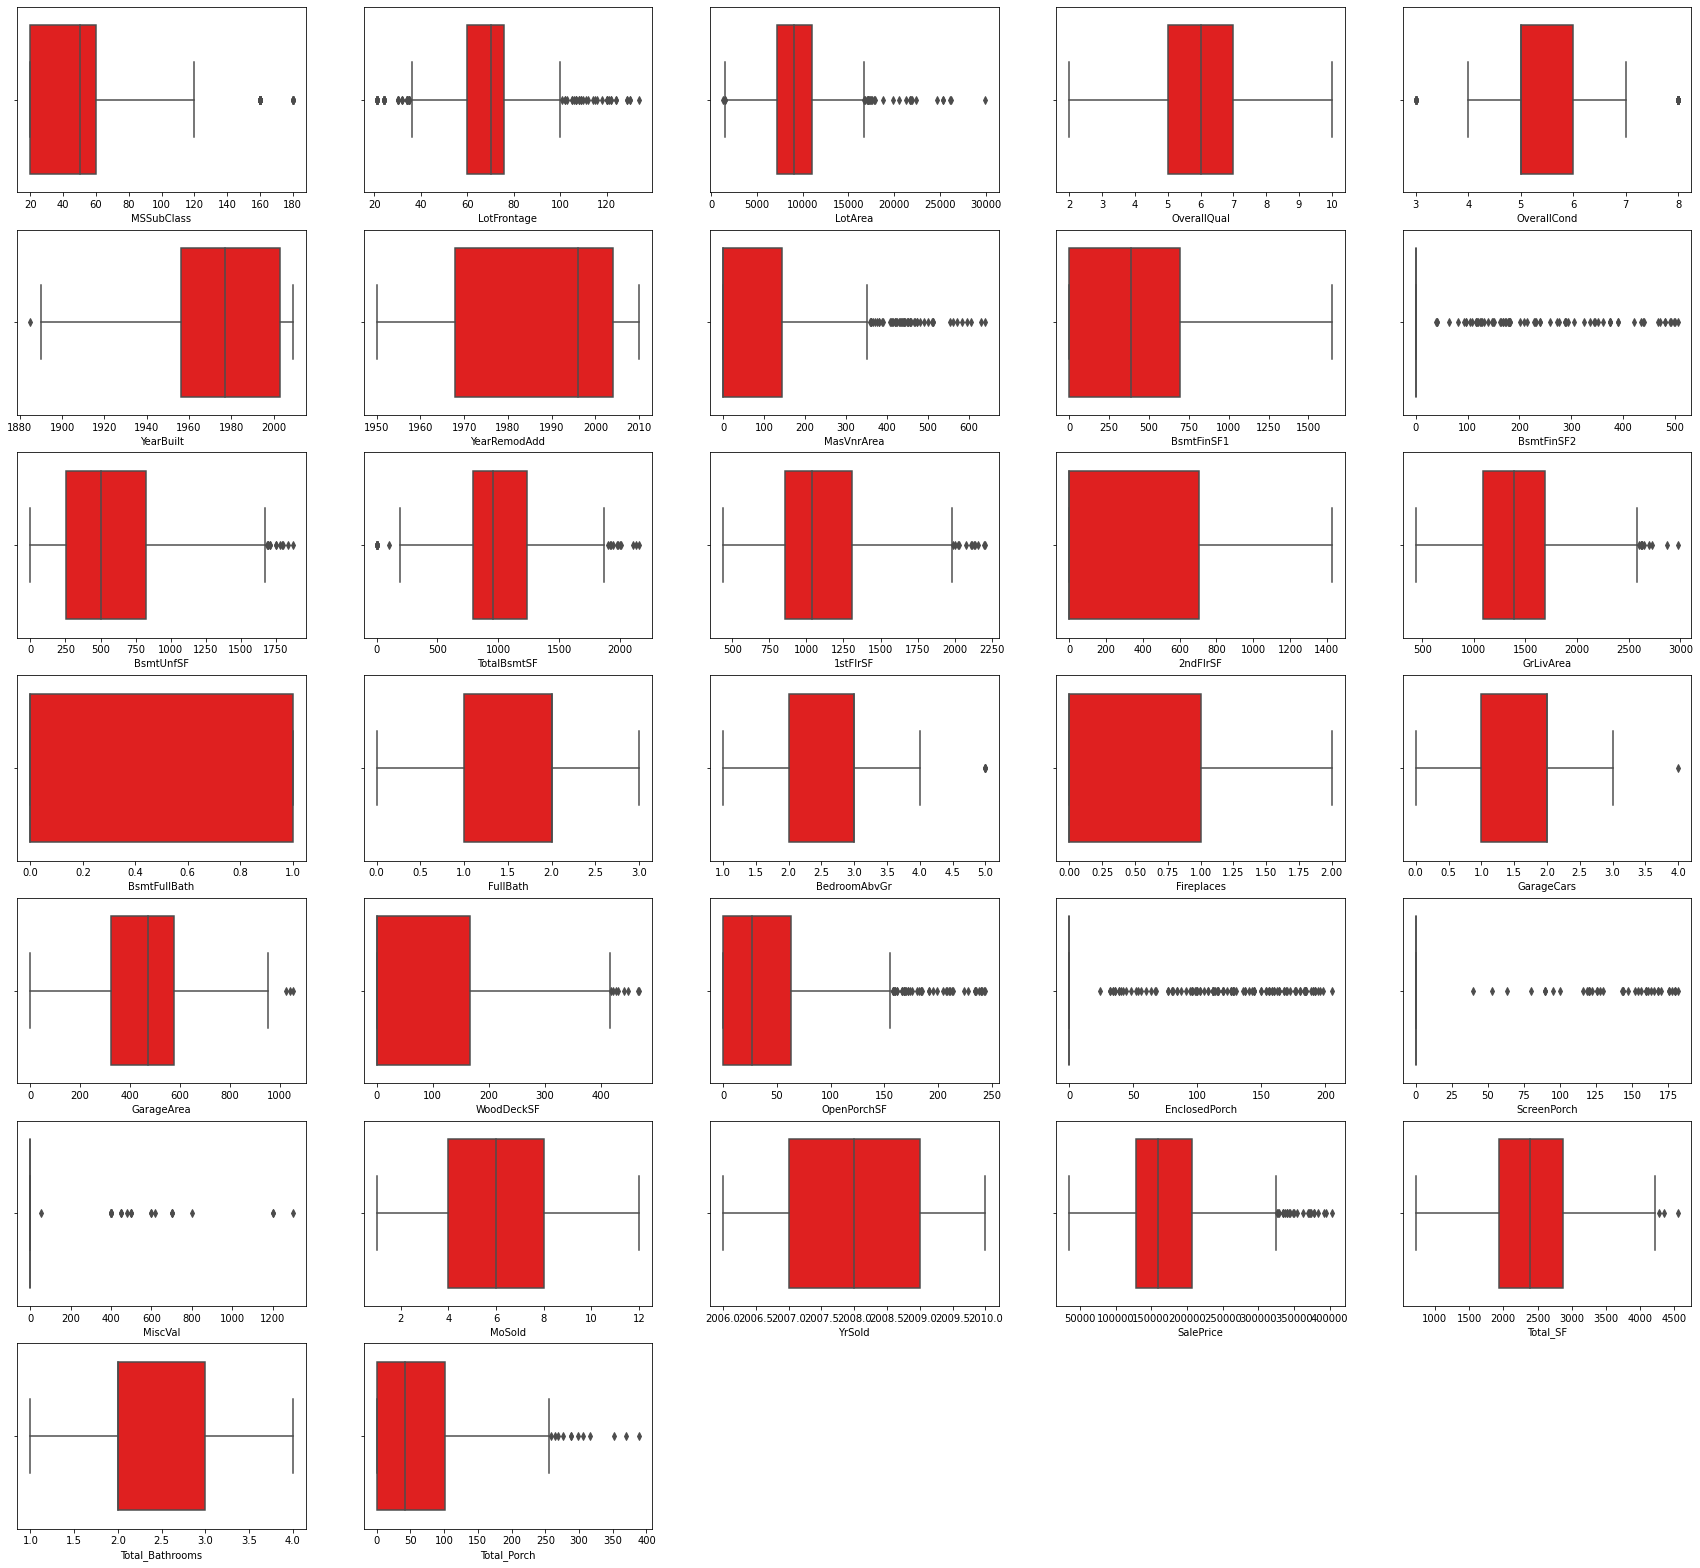

In [109]:
col = df_train1.columns

plt.figure(figsize=(30,28))
for i in range(0,len(col)):
  plt.subplot(7,5,i+1)
  sns.boxplot(df_train1[df_train1.columns[i]],color='red')
  plt.tight_layout

# `Data Preprocessing`

`One Hot Encoding`

In [110]:
from sklearn.preprocessing import OneHotEncoder

df_train2 = pd.get_dummies(df_train2)

`menggabungkan variabel numerik dan variabel kategorik`

In [111]:
dataset = df_train1.join(df_train2)
dataset.shape

(1015, 132)

In [112]:
X = dataset.drop(['SalePrice'],axis=1)
y = dataset['SalePrice']

`split data train dan data test untuk modelling`

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=321)

`Perbandingan Transformasi Standarisasi dan Robust`

In [114]:
from sklearn.preprocessing import StandardScaler,RobustScaler

col = X.select_dtypes(exclude='uint8').columns

#standarisasi
stdSc = StandardScaler()
X_train.loc[:, col] = stdSc.fit_transform(X_train.loc[:, col])
X_test.loc[:, col] = stdSc.transform(X_test.loc[:, col])

#Robust
RbSc = RobustScaler()
X_train2.loc[:, col] = RbSc.fit_transform(X_train2.loc[:, col])
X_test2.loc[:, col] = RbSc.transform(X_test2.loc[:, col])



# Model ML

In [115]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

In [116]:
models = [LinearRegression(), Lasso(alpha=1e-3), Ridge(alpha=1.0), ElasticNet(alpha=1e-3), ExtraTreesRegressor(),
          KNeighborsRegressor(), RandomForestRegressor(), DecisionTreeRegressor(), SVR(kernel= 'rbf'), XGBRegressor()]

In [117]:
#StandartScaller
MAE1 = []

for reg in models:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    #print(f'model: {str(reg)}')
    #check overfitting
    #print('reg score R2 test :',format(reg.score(X_test,y_test)))
    #print('reg score R2 train :',format(reg.score(X_train,y_train)))
    
    #check error
    MAE1.append(metrics.mean_absolute_error(y_test,y_pred))
    
    #print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))
    #print('-'*20, '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+11, tolerance: 2.812e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+11, tolerance: 2.812e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[04:56:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [118]:
#RobustScaller
MAE2 = []

for reg in models:
    reg.fit(X_train2, y_train2)
    y_pred2 = reg.predict(X_test2)

    #print(f'model: {str(reg)}')
    #check overfitting
    #print('reg score R2 test :',format(reg.score(X_test2,y_test2)))
    #print('reg score R2 train :',format(reg.score(X_train2,y_train2)))
    
    #check error
    MAE2.append(metrics.mean_absolute_error(y_test2,y_pred2))
    #print('Multiple Linear MAE',metrics.mean_absolute_error(y_test2,y_pred2))
    #print('-'*20, '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+11, tolerance: 2.780e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+11, tolerance: 2.780e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[04:56:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
n = list(zip(models, MAE1, MAE2))
pd.DataFrame(n, columns = ['Model','MAE_StdSc','MAE_RbSc']).sort_values(['MAE_StdSc','MAE_RbSc'],ascending= True)

,Model,MAE_StdSc,MAE_RbSc
9,XGBRegressor(),1.276544e+04,13780.785092
4,"(ExtraTreeRegressor(random_state=1402021200), ...",1.364966e+04,14994.852393
6,"(DecisionTreeRegressor(max_features='auto', ra...",1.402399e+04,14965.598918
2,Ridge(),1.426456e+04,14351.034727
3,ElasticNet(alpha=0.001),1.432504e+04,14386.171930
1,Lasso(alpha=0.001),1.440793e+04,14393.387972
5,KNeighborsRegressor(),1.610871e+04,23691.523279
7,DecisionTreeRegressor(),2.352400e+04,22003.216393
8,SVR(),5.047761e+04,48878.355365
0,LinearRegression(),5.484503e+12,14433.892504


1. *Dapat dilihat model yang mendominasi adalah model NON LINEAR*
2. *StandartScaler lebih meminimumkan error dibanding RobustScaler*

`check overfitting`

In [120]:
MAE = []
R2test = []
R2train = []

for reg in models:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    #check overfitting
    R2test.append(reg.score(X_test,y_test))
    R2train.append(reg.score(X_train,y_train))

    #check error
    MAE.append(metrics.mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+11, tolerance: 2.812e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+11, tolerance: 2.812e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[04:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [121]:
n = list(zip(models, MAE, R2test, R2train))
pd.DataFrame(n, columns = ['Model','MAE','R2_test','R2_train']).sort_values(['MAE'],ascending= True)

,Model,MAE,R2_test,R2_train
9,XGBRegressor(),1.276544e+04,9.177178e-01,0.969587
4,"(ExtraTreeRegressor(random_state=36775862), Ex...",1.376579e+04,9.099183e-01,1.000000
6,"(DecisionTreeRegressor(max_features='auto', ra...",1.397584e+04,9.012646e-01,0.984403
2,Ridge(),1.426456e+04,9.102274e-01,0.923832
3,ElasticNet(alpha=0.001),1.432504e+04,9.094790e-01,0.923938
1,Lasso(alpha=0.001),1.440793e+04,9.083233e-01,0.923968
5,KNeighborsRegressor(),1.610871e+04,8.786186e-01,0.900706
7,DecisionTreeRegressor(),2.269300e+04,7.685379e-01,1.000000
8,SVR(),5.047761e+04,-5.395996e-02,-0.033042
0,LinearRegression(),5.484503e+12,-1.443469e+18,0.924009


**terlihat bahwa Ridge lebih mampu meminimumkan tingkat overfitting**

# Parameter Tuning

`memilih XGBRegressor dan Ridge untuk dilakukan tuning`

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfolds = KFold(n_splits=5, shuffle=True, random_state=123)

ridge = Ridge()
parameter = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False],'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameter, cv=kfolds)
grid_ridge.fit(X_train, y_train)

sc_ridge = grid_ridge.best_estimator_
print(sc_ridge)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Ridge(alpha=0.1, normalize=True, tol=1e-06)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

In [127]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=123)
xgb = XGBRegressor()

parameter = {'max_depth': [2, 3, 5, 10, 15],
        'learning_rate': [0.05,0.1,0.15,0.20],
        'min_child_weight' : [1,2,3,4],
        'gamma': np.random.uniform (0, 10, 3),
        'booster': ['gbtree','gblinear']
        }

grid_xgb = GridSearchCV(xgb, parameter, cv=kfolds)
grid_xgb.fit(X_train, y_train)

sc_xgb = grid_xgb.best_estimator_
print(sc_xgb)

[06:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [130]:
ridge = Ridge(alpha=0.1, normalize=True, tol=1e-06)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

#check overfitting
print('reg score R2 test :',format(ridge.score(X_test,y_test)))
print('reg score R2 train :',format(ridge.score(X_train,y_train)))
    
#check error
print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))

reg score R2 test : 0.911889002277871
reg score R2 train : 0.9218869036308551
Multiple Linear MAE 14121.845046056713


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [135]:
xgb = XGBRegressor(gamma=3.2773534988584583, max_depth=5, min_child_weight=2, n_estimators= 800)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

#check overfitting
print('reg score R2 test :',format(xgb.score(X_test,y_test)))
print('reg score R2 train :',format(xgb.score(X_train,y_train)))
    
#check error
print('Multiple Linear MAE',metrics.mean_absolute_error(y_test,y_pred))

[06:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg score R2 test : 0.9072687470259345
reg score R2 train : 0.9999982524525154
Multiple Linear MAE 13199.568878073771


# `Kesimpulan`

**KESIMPULAN : LASSO REGRESSION MEMILIKI AKURASI PALING TINGGI**

In [136]:
xgb = XGBRegressor(gamma=3.2773534988584583, max_depth=5, min_child_weight=2, n_estimators= 800)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
error = y_pred - y_test

[06:58:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


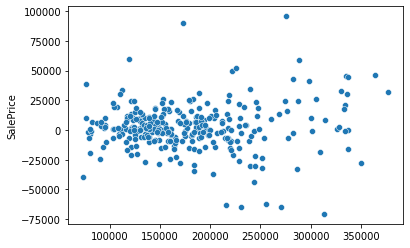

In [137]:
sns.scatterplot(y_pred,error)

`terbukti tidak terjadi heteroskedastisitas`

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


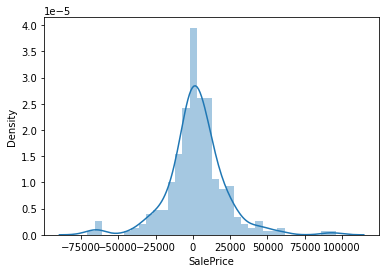

In [138]:
sns.distplot(error)

`terbukti bahwa error berdistribusi normal`